In [160]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from numpy import nan as Nan
from sklearn.linear_model import LinearRegression


# Procesamiento de los Fondos


In [89]:
emisoras = ['ACTICOB', 'ACTIGOB', 'ACTIMED', 'ACTIREN', 'ALTERNA', 'IMPULSA',
       'ACTI500', 'MAYA', 'ACTVIDA']

Vamos a crear una lista de tuplas, una tupla es una pareja de valores (x,y).  
(nombre del fondo, prediccion por historial de precios)  
lista_emisoras = [('ACTICOB',x1), ('ACTIGOB',x2), ('ACTIMED',x3), ('ACTIREN',x4), ('ALTERNA',x5) , ('IMPULSA',x5)
       ('ACTI500',x6), ('MAYA',x7) ('ACTVIDA',x8)]






In [206]:
emisoras = [
            ('ACTIGOB',None),
            ('ACTIMED',None), 
            ('ACTIREN',None), 
            ('ALTERNA',None),
            ('ACTVIDA',None),
            ('IMPULSA',None),
            ('MAYA',None), 
            ('ACTICOB',None),
            ('ACTI500',None) 
            ]

In [91]:
preciosB2 = pd.read_csv("precios-B2.csv",sep=',')
preciosB2

,Fecha,Emisora,Serie,Precio
0,20161201,ACTICOB,B-2,26.208114
1,20161201,ACTIGOB,B-2,3.982440
2,20161201,ACTIMED,B-2,4.409726
3,20161201,ACTIREN,B-2,7.491280
4,20161201,ALTERNA,B-2,3.342991
...,...,...,...,...
5938,20191213,MAYA,B2,31.985886
5939,20191217,MAYA,B2,32.955200
5940,20191224,MAYA,B2,32.873076
5941,20200106,MAYA,B2,33.232250


## Acticob

('ACTIGOB', None)
[3.98244  3.982666 3.983978 3.984502 3.98504  3.98558  3.985993 3.987422
 3.987855 3.988187 3.988333 3.989303 3.989649 3.990098 3.990349 3.990613
 3.991806 3.992197 3.992336 3.992585 3.992985 3.992985 3.994259 3.994667
 3.994534 3.994796 3.994797 3.995922 3.996149 3.996285 3.996368 3.996877
 3.998305 3.998732 3.999037 3.999285 3.999699 4.001017 4.001545 4.002021
 4.002347 4.002744 4.004172 4.004368 4.00479  4.005135 4.005546 4.007577
 4.008032 4.008659 4.008923 4.00995  4.01043  4.010903 4.011296 4.011766
 4.013079 4.013525 4.013777 4.014272 4.014954 4.016244 4.01661  4.016928
 4.017269 4.017652 4.01896  4.019431 4.019885 4.020336 4.020809 4.022118
 4.022549 4.022923 4.023351 4.023779 4.025608 4.026043 4.026504 4.027088
 4.028446 4.028765 4.029162 4.029583 4.030039 4.031482 4.031987 4.032365
 4.03281  4.033382 4.034836 4.035258 4.03548  4.03785  4.03849  4.039048
 4.039439 4.039913 4.041105 4.041418 4.041571 4.041403 4.042209 4.042209
 4.044117 4.04463  4.045079 4.045

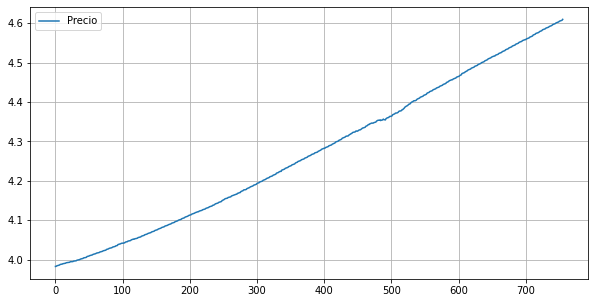

In [231]:

emisora = emisoras[0]
print(emisora)
emisora = emisora[0]
historico = preciosB2[preciosB2.Emisora == emisora].sort_values(by='Fecha')
#print(historico.head(10).to_string())
historico = historico.groupby(by="Fecha").sum()
#print(historico.head(10).to_string())


historico = historico.reset_index()
#print(historico.Precio.head(50).to_string())

y = historico.Precio.values
x = historico.Precio.index.values
print(y)

x = x.reshape((-1, 1))

model = LinearRegression()
model = model.fit(x, y)

r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

plt.figure(figsize=[10,5])
plt.grid(True)
plt.plot(historico['Precio'],label='Precio')
plt.legend(loc=2)


In [229]:
y_pred = model.predict([[751]])
print('predicted response:', y_pred)

predicted response: [4.59121871]


# Procesamiento Clientes


In [93]:
fondos = pd.read_csv("clientes.csv",sep=',')
fondos

,BP_Único_y/o_Repetido,CLAVE_CLIENTE,CATEGORIA_PRODUCTO,DETALLE_PRODUCTO,POSICION_CUENTA_FECHA_TRANS
0,Único,90000175,FONDOS DE DEUDA,"ACTIRENT, S.A. DE C.V. SOC INV DE INSTR DE DEUDA","202,017"
1,Repetido,90001470,FONDOS DE DEUDA,"ACTIRENT, S.A. DE C.V. SOC INV DE INSTR DE DEUDA","3,643"
2,Repetido,90001801,FONDOS DE DEUDA,"ACTIGOBER, S.A. DE C.V. SOC INV INSTRUM DE DEUDA","133,605"
3,Repetido,90001991,FONDOS DE COBERTURA,ACTICOB B,897
4,Repetido,90001991,RENTA VARIABLE,"FONDO MAYA,S.A DE C.V.,SOC. DE INV. DE RENTA V...","265,258"
...,...,...,...,...,...
41453,Repetido,97509467,FONDOS DE DEUDA,"ACTIMED, S.A. DE C.V SOC DE INV EN INSTR DE DEUDA","45,010"
41454,Repetido,97509483,FONDOS DE DEUDA,"ACTIGOBER, S.A. DE C.V. SOC INV INSTRUM DE DEUDA","4,498"
41455,Repetido,97509608,FONDOS DE DEUDA,"ACTIMED, S.A. DE C.V SOC DE INV EN INSTR DE DEUDA","49,999"
41456,Repetido,97516819,FONDOS DE DEUDA,"ACTIMED, S.A. DE C.V SOC DE INV EN INSTR DE DEUDA","49,999"


In [94]:
fondos = fondos.head(20000)
fondos

,BP_Único_y/o_Repetido,CLAVE_CLIENTE,CATEGORIA_PRODUCTO,DETALLE_PRODUCTO,POSICION_CUENTA_FECHA_TRANS
0,Único,90000175,FONDOS DE DEUDA,"ACTIRENT, S.A. DE C.V. SOC INV DE INSTR DE DEUDA","202,017"
1,Repetido,90001470,FONDOS DE DEUDA,"ACTIRENT, S.A. DE C.V. SOC INV DE INSTR DE DEUDA","3,643"
2,Repetido,90001801,FONDOS DE DEUDA,"ACTIGOBER, S.A. DE C.V. SOC INV INSTRUM DE DEUDA","133,605"
3,Repetido,90001991,FONDOS DE COBERTURA,ACTICOB B,897
4,Repetido,90001991,RENTA VARIABLE,"FONDO MAYA,S.A DE C.V.,SOC. DE INV. DE RENTA V...","265,258"
...,...,...,...,...,...
19995,Repetido,93120632,FONDOS DE DEUDA,"ACTIMED, S.A. DE C.V SOC DE INV EN INSTR DE DEUDA","4,089"
19996,Repetido,93120681,FONDOS DE DEUDA,"ACTIMED, S.A. DE C.V SOC DE INV EN INSTR DE DEUDA","208,435"
19997,Repetido,93120699,FONDOS DE DEUDA,"ACTIRENT, S.A. DE C.V. SOC INV DE INSTR DE DEUDA","10,002"
19998,Repetido,93120699,FONDOS DE DEUDA,"ACTIMED, S.A. DE C.V SOC DE INV EN INSTR DE DEUDA","195,971"


 - Tomamos las claves unicas de cliente
    - querys
 - para c in claves crear el df de sus productos
 - Calcular rendimientos de ese portafolio

In [95]:
claves_unicas= fondos.CLAVE_CLIENTE.unique()
#len(claves_unicas)


#16395
for i in range(3,4):
    aux = fondos[fondos.CLAVE_CLIENTE == claves_unicas[i]].reset_index(drop=True)
    print(aux.to_string())












    aux = pd.DataFrame()



  BP_Único_y/o_Repetido  CLAVE_CLIENTE   CATEGORIA_PRODUCTO                                       DETALLE_PRODUCTO POSICION_CUENTA_FECHA_TRANS
0              Repetido       90001991  FONDOS DE COBERTURA                                              ACTICOB B                        897 
1              Repetido       90001991       RENTA VARIABLE  FONDO MAYA,S.A DE C.V.,SOC. DE INV. DE RENTA VARIABLE                    265,258 
2              Repetido       90001991      FONDOS DE DEUDA       ACTIRENT, S.A. DE C.V. SOC INV DE INSTR DE DEUDA                         10 
